In [2]:
!pip install PyDrive pandas numpy matplotlib scipy gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# LINK de share: https://drive.google.com/file/d/1EKnr9m--vsEeX9x4sJQ58m3dkl7_23ub/view?usp=sharing
# ID: 1EKnr9m--vsEeX9x4sJQ58m3dkl7_23ub
# LINK DE DESCARGA: https://drive.google.com/uc?id=1EKnr9m--vsEeX9x4sJQ58m3dkl7_23ub
!gdown https://drive.google.com/uc?id=1EKnr9m--vsEeX9x4sJQ58m3dkl7_23ub
#1_4
#!gdown https://drive.google.com/uc?id=1EKnr9m--vsEeX9x4sJQ58m3dkl7_23ub

Downloading...
From: https://drive.google.com/uc?id=1EKnr9m--vsEeX9x4sJQ58m3dkl7_23ub
To: /content/TUP2.txt
100% 1.36M/1.36M [00:00<00:00, 44.4MB/s]


In [4]:
#Nombre del archivo CAMBIAR
archivo = 'TUP2.txt'
with open(archivo, "r") as r:
  with open('data.csv', "w") as w:
    w.write(r.read().replace(';' , '\n'))

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statistics
%matplotlib inline

In [47]:
df = pd.read_csv('data.csv', header=None)
res, bins = pd.cut(df[df.columns[0]],range(55000, 130000, 8000), right=False, retbins=True)
res = pd.DataFrame(res)
res

,0
0,"[55000, 63000)"
1,"[63000, 71000)"
2,"[63000, 71000)"
3,"[111000, 119000)"
4,"[95000, 103000)"
...,...
212987,"[79000, 87000)"
212988,"[95000, 103000)"
212989,"[111000, 119000)"
212990,"[87000, 95000)"


In [32]:
res.value_counts().to_csv('tabla_frecuencia.csv')
res.value_counts()

[87000, 95000)      24088
[55000, 63000)      24087
[63000, 71000)      24070
[103000, 111000)    24003
[71000, 79000)      23990
[111000, 119000)    23980
[95000, 103000)     23867
[79000, 87000)      23721
[119000, 127000)    21186
dtype: int64

In [33]:
samples = res.value_counts().sort_index()
samples.to_numpy().flatten()

array([24087, 24070, 23990, 23721, 24088, 23867, 24003, 23980, 21186])

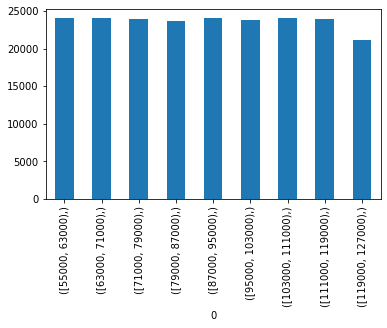

In [34]:
fig, ax = plt.subplots(figsize=(6, 3.5))
(
    pd.Series(samples).plot.bar(ax=ax)
)


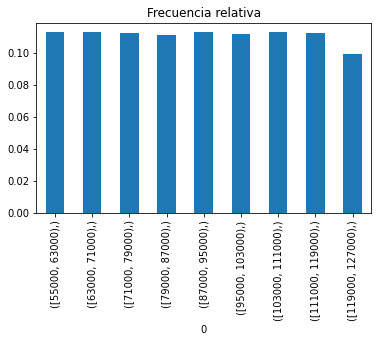

In [35]:
# Creamos histograma de frecuencias
fig, ax = plt.subplots(figsize=(6, 3.5))
(
    pd.Series(samples/samples.sum(axis=0)).plot.bar(ax=ax, title='Frecuencia relativa')
)


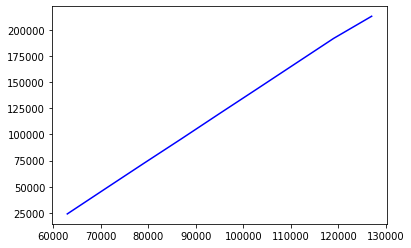

In [36]:
cumulative = np.cumsum(pd.Series(samples))
# Creamos grafico de frecuencias acumuladas
plt.plot(bins[1:], cumulative, c='blue')
plt.show()

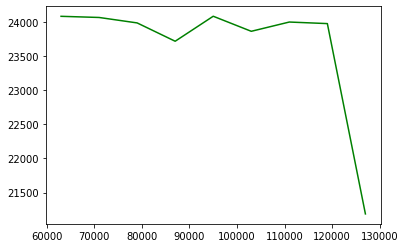

In [37]:
plt.plot(bins[1:], samples, c='green')
plt.show()

In [49]:
medidas_tendencia_central = {}
medidas_tendencia_central['Media'] = df[df.columns[0]].mean()
medidas_tendencia_central['Mediana'] = df[df.columns[0]].median()
medidas_tendencia_central['Moda'] = list(df[df.columns[0]].mode())
medidas_tendencia_central['Porcentaje de autos que realizan la VTV con menos de 70mil Km'] = 21.21159

medidas_tendencia_central

{'Media': 90508.47110220102,
 'Mediana': 90547.0,
 'Moda': [58550, 71331, 113294, 115473],
 'Porcentaje de autos que realizan la VTV con menos de 70mil Km': 21.21159}

In [56]:
medidas_dispersion = {}
medidas_dispersion['Varianza'] = df[df.columns[0]].var()
medidas_dispersion['Desvio estándar'] = df[df.columns[0]].std()
medidas_dispersion['Cuartil 1'] = df[df.columns[0]].quantile(0.25)
medidas_dispersion['Cuartil 3'] = df[df.columns[0]].quantile(0.75)
medidas_dispersion['Rango intercuartilico'] = df[df.columns[0]].quantile(0.75) - df[df.columns[0]].quantile(0.25)
medidas_dispersion['Coeficiente de variación'] = (df[df.columns[0]].std() / df[df.columns[0]].mean()) * 100
medidas_dispersion['Coeficiente de asimetría de Pearson'] = df[df.columns[0]].skew()
medidas_dispersion['P30'] = np.percentile(df[df.columns[0]], 30)

medidas_dispersion

63897.6


{'Varianza': 421244853.7043449,
 'Desvio estándar': 20524.250381057645,
 'Cuartil 1': 72692.75,
 'Cuartil 3': 108306.0,
 'Rango intercuartilico': 35613.25,
 'Coeficiente de variación': 22.676607096679298,
 'Coeficiente de asimetría de Pearson': 0.0002707789859456798,
 'P30': 76231.60781055255,
 'P30 2': 76254.29999999999}

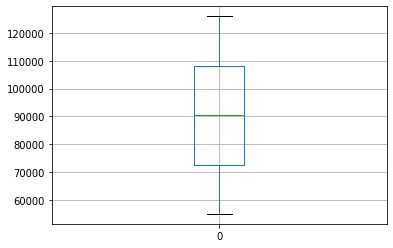

In [40]:
df.boxplot(column=[df.columns[0]])